In [3]:
# Import libraries 
import numpy as np
import pandas as pd
import string

In [4]:
#Load data
df = pd.read_csv('spam_or_not_spam.csv')
df = df[df.email.notnull()]
df.info()
df.email[2600]
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB
                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


In [5]:
# Make dictionary 

# Extracting features from text files
# word2vec
import nltk 
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'after', 'from', 'any', 'because', 'against', 'her', "hadn't", 'about', 'only', 'hadn', 'no', 'aren', 'now', 'at', "won't", 'below', 'll', "you'll", 'y', 'your', 'both', 'to', 'again', 'once', 'out', 'further', 'was', 'does', 'yourselves', 'theirs', 'ours', 'until', "it's", "you'd", 'some', "weren't", 'he', 'itself', 'do', 'more', "hasn't", 'yours', 'very', 'ma', 's', 'themselves', 'nor', 'we', 'ourselves', 'him', 'wasn', 'during', 'our', 'what', 'which', 'won', 'd', 'them', 've', 'herself', 'having', 'and', 'am', 'doesn', 'this', 'or', "that'll", 'few', 'shouldn', "aren't", "should've", 'doing', 'in', 'been', 'is', 'most', "wouldn't", "she's", 'when', 'should', 'as', 'it', 'so', 'm', "mightn't", 'if', 'isn', "isn't", 'but', 'needn', 'wouldn', 'haven', 'o', 'into', 'my', 'did', 'down', 'had', 'his', 'will', 'of', 'the', 'they', 'mightn', 'on', 'there', 'myself', "haven't", 'all', 'over', 'before', 're', 't', 'these', 'don', 'ain', 'didn', 'can', 'just', "mustn't", 'under', "shouldn't"

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stopwords)
count_vect.fit_transform(df.email)
#print(count_vect.vocabulary_)


<2999x33973 sparse matrix of type '<class 'numpy.int64'>'
	with 262870 stored elements in Compressed Sparse Row format>

In [7]:
# Split data on train and test data
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train.info()
print('size of train data'+str(len(train)))
print('size of test data'+str(len(test)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2399 entries, 2338 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2399 non-null   object
 1   label   2399 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.2+ KB
size of train data2399
size of test data600


In [8]:
# vectorize data

count_vect = CountVectorizer(stop_words=stopwords,vocabulary = count_vect.vocabulary_)

X_train_counts = count_vect.fit_transform(train.email)
X_test_counts = count_vect.fit_transform(test.email)

print(f'Shape of Term Frequency train Matrix: {X_train_counts.shape}')
print(f'Shape of Term Frequency test Matrix: {X_test_counts.shape}')
                     

Shape of Term Frequency train Matrix: (2399, 33973)
Shape of Term Frequency test Matrix: (600, 33973)


In [9]:

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
print(X_train_tfidf)
print(f'Shape of trian TFIDF Matrix: {X_train_tfidf.shape}') 
print(f'Shape of test TFIDF Matrix: {X_test_tfidf.shape}') 

  (0, 31276)	0.08709591426737073
  (0, 31128)	0.13254691903791
  (0, 31095)	0.057791169998284146
  (0, 31072)	0.062249216794337724
  (0, 31059)	0.12995830382574025
  (0, 31048)	0.04568576273572449
  (0, 29651)	0.06501767444121526
  (0, 29572)	0.11777221105534591
  (0, 29505)	0.1568327533556034
  (0, 29044)	0.21421822626772297
  (0, 29043)	0.11777221105534591
  (0, 28877)	0.09189212397107842
  (0, 28547)	0.23304215812161733
  (0, 28418)	0.1191096942729784
  (0, 24854)	0.09367188836892992
  (0, 24715)	0.2599166076514805
  (0, 24694)	0.19382073674426278
  (0, 24059)	0.08460714039622476
  (0, 23839)	0.07897188497797128
  (0, 22960)	0.09875803412672937
  (0, 22570)	0.14339552859067184
  (0, 22343)	0.11534582120434833
  (0, 22341)	0.11219525889166096
  (0, 22286)	0.07116991563129318
  (0, 21134)	0.14339552859067184
  :	:
  (2398, 17400)	0.22492329662492863
  (2398, 17033)	0.10951455589115917
  (2398, 16667)	0.1863810300772559
  (2398, 16453)	0.1104043076108303
  (2398, 16439)	0.0552577143553

In [10]:
# Train data
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clfNB = MultinomialNB()

#clfNB.partial_fit(X_train_tfidf,train.label, classes=np.unique(train.label))
clfNB.fit(X_train_tfidf,train.label)
print('nb_score='+str(clfNB.score(X_train_tfidf,train.label)))


from sklearn.linear_model import LogisticRegression as LR
clfLR = LR(max_iter=1,solver='saga',C=10)

clfLR.fit(X_train_tfidf,train.label)
print('LR_score='+str(clfLR.score(X_train_tfidf,train.label)))

nb_score=0.9078782826177574
LR_score=0.976240100041684


C:\Users\Robert\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [11]:
# Check model on testing data

predictedNB = clfNB.predict_proba(X_test_tfidf)
predictedLR = clfLR.predict_proba(X_test_tfidf)
print(clfNB.score(X_test_tfidf,test.label))
print(clfLR.score(X_test_tfidf,test.label))


0.8933333333333333
0.9683333333333334


# WYNIKI


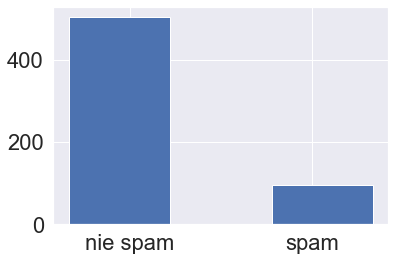

In [22]:
# histogram spam/nie spam
import matplotlib.pyplot as plt
ig1 = plt.figure()
ax1 = plt.subplot(111)

#ax1.hist([predictedNB,predictedLR], bins=3, label = ['NB','LR'])
ax1.hist(test.label, bins=3)

# Create names
plt.xticks( [0.2,0.8],['nie spam','spam'])



plt.show()


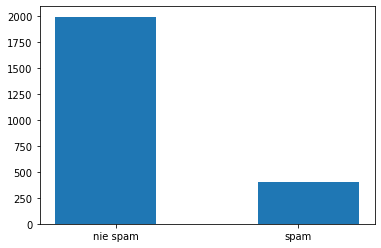

In [13]:
# histogram spam/nie spam

ig1 = plt.figure()
ax1 = plt.subplot(111)

#ax1.hist([predictedNB,predictedLR], bins=3, label = ['NB','LR'])
ax1.hist(train.label, bins=3)

# Create names
plt.xticks( [0.2,0.8],['nie spam','spam'])

plt.show()

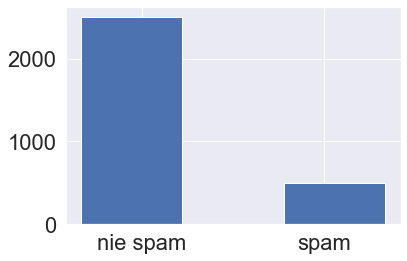

In [21]:
# histogram spam/nie spam

ig1 = plt.figure()
ax1 = plt.subplot(111)

#ax1.hist([predictedNB,predictedLR], bins=3, label = ['NB','LR'])
ax1.hist(df.label, bins=3)

# Create names
plt.xticks( [0.2,0.8],['nie spam','spam'])



plt.show()

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
predictedNB = clfNB.predict(X_test_tfidf)
predictedLR = clfLR.predict(X_test_tfidf)
cm_NB = confusion_matrix(y_true=test.label, y_pred=predictedNB)
cm_LR = confusion_matrix(y_true=test.label, y_pred=predictedLR)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

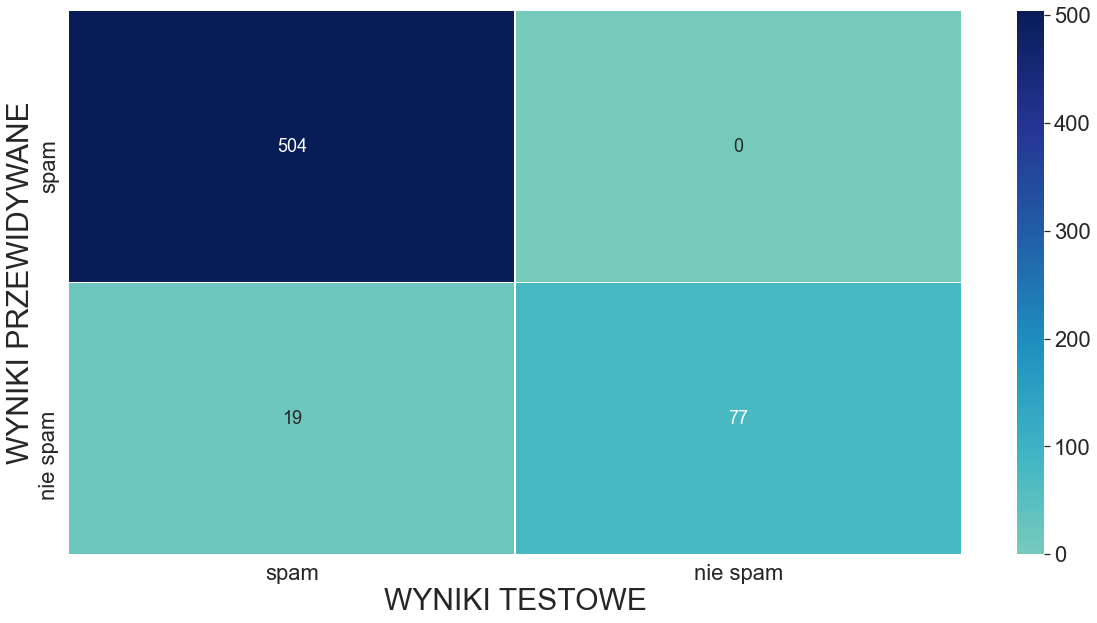

In [19]:
# MACIERZ LR
plt.figure(figsize=(20,10))
 
ax = sns.heatmap(cm_LR , annot=True, fmt="d",linewidths=.5, center = 90, cmap="YlGnBu",annot_kws={"size": 18} \
                 , yticklabels=['spam','nie spam'], xticklabels=['spam','nie spam'])
ax.set_ylabel('WYNIKI PRZEWIDYWANE',size=30)
ax.set_xlabel('WYNIKI TESTOWE',size=30)
sns.set(font_scale=2)

Text(0.5, 56.5, 'WYNIKI TESTOWE')

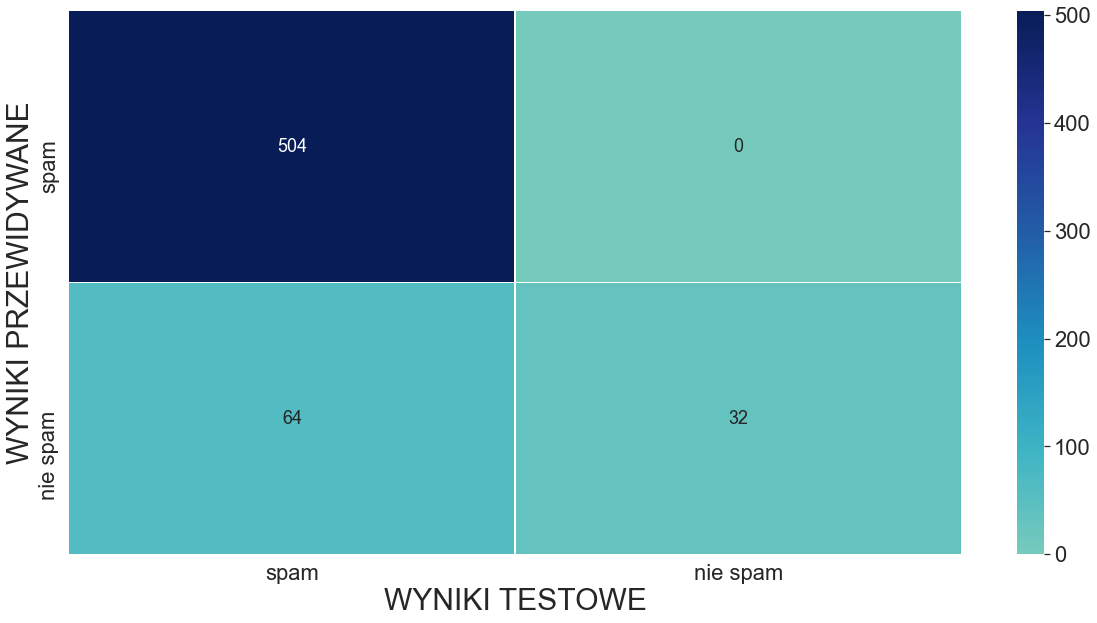

In [20]:
# MACIERZ NB
plt.figure(figsize=(20,10))

ax = sns.heatmap(cm_NB , annot=True, fmt="d",linewidths=.5, center = 90, cmap="YlGnBu",annot_kws={"size": 18} \
                 , yticklabels=['spam','nie spam'], xticklabels=['spam','nie spam'])
ax.set_ylabel('WYNIKI PRZEWIDYWANE',size=30)
ax.set_xlabel('WYNIKI TESTOWE',size=30)
